<a href="https://colab.research.google.com/github/MorielDev/TensorFlow/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING HEALTH COSTS WITH REGRESSION**

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-06-05 18:16:18--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.8’

insurance.csv.8     100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2024-06-05 18:16:18 (28.1 MB/s) - ‘insurance.csv.8’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# FROM THE INSTRUCTION WE OUGHT TO CHANGE EVERY CATEGORICAL COLUMS TO NUMERICAL

In [ ]:
#Convert categorical columns to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])


In [ ]:
# Split features (X) and target variable (y)
X = dataset.drop(columns=['expenses'])
y = dataset['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


# **The StandardScaler is used to standardize features by removing the mean and scaling to unit variance.**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **From the dataset, most of the categorical columns where mostly boolean and int. It was clearly needed to make sure the datatypes are consistent.**

In [ ]:
# Ensure data types are consistent
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
train_labels = y_train.astype('float32')
test_labels = y_test.astype('float32')

In [ ]:
# Pop off the "expenses" column from the datasets to create new datasets called train_labels and test_labels
train_labels = y_train
test_labels = y_test

# **We used Swish instead of ReLU because of a better performance.**

*ReLU was useed earlier but the loss and mae were producing redundant amount of fp numbers.*

In [ ]:
# Define the model with Swish activation function
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.swish, input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation=tf.nn.swish),
    layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Train the model with the training dataset
history = model.fit(X_train, train_labels, epochs=100, validation_split=0.2, verbose=0)


In [ ]:
# Create test_dataset as an alias for X_test to match the expected variable name in the evaluation cell
test_dataset = X_test

In [ ]:
# Evaluate model performance on test dataset
test_loss, test_mae, test_mse = model.evaluate(X_test, test_labels)
print('Test Loss:', test_loss)
print('Test MAE:', test_mae)
print('Test MSE:', test_mse)

9/9 [==============================] - 0s 4ms/step - loss: 24480554.0000 - mean_absolute_error: 3235.1230 - mean_squared_error: 24480554.0000
Test Loss: 24480554.0
Test MAE: 3235.123046875
Test MSE: 24480554.0


9/9 - 0s - loss: 24480554.0000 - mean_absolute_error: 3235.1230 - mean_squared_error: 24480554.0000 - 60ms/epoch - 7ms/step
Testing set Mean Abs Error: 3235.12 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


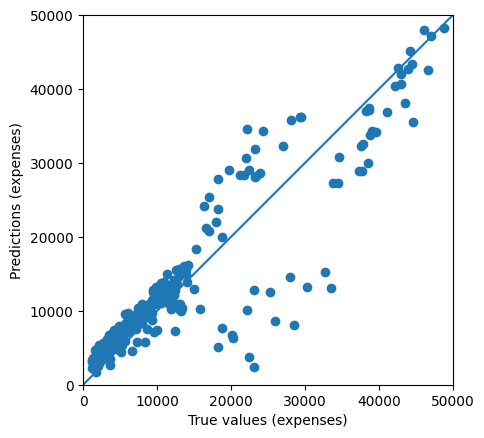

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
